<p style="text-align: center; font-weight: bold; font-size: 16pt;font-family: "Computer Modern", sans-serif">Problem Set 2 </p> 
<p style="text-align: right; font-size: 12pt; font-family: "Computer Modern", sans-serif">Erik Butcher</p>

#### Q1 
\begin{align}
E = E^o + \frac{RT}{nF}ln\Bigl(\frac{[Ox]}{[R]}\Bigr)= E^o + \frac{0.059}{n}log_{10}\Bigl(\frac{[Ox]}{[R]}\Bigr) \\ \; \\
Fe^{3+} + e^- \rightarrow Fe^{2+} & \Leftarrow \boxed{ \texttt{Gain of electron - Reduction}} \\ \; \\
[Re] + e^- \rightarrow [Ox] \\ \; \\
Answer \;(both \; valid): \\
\boldsymbol{ c) \;\; E = E^o + \frac{0.059}{n}log_{10}\Bigl(\frac{[Fe^{3+}]}{[Fe^{2+}]}\Bigr)} \\ \; \\
\boldsymbol{ d) \;\; E = E^o - \frac{0.059}{n}log_{10}\Bigl(\frac{[Fe^{2+}]}{[Fe^{3+}]}\Bigr)} 
\end{align}

#### Q2
\begin{align*}
E_{probe} = K + 0.059\cdot log[F^-] \\ \; \\
E_{probe} = V\cdot q & \Leftarrow \boxed{ \texttt{charge ratiometric, so regarded q as 1}} \\ \; \\
V_0 = K + 0.059\cdot log[F^-] \\ \; \\
0.112V = K + 0.059\cdot log[0.01] \\ \; \\
0.112V = K - 0.059 & \Leftarrow \boxed{ \texttt{K = 0.23V}} \\ \; \\
V_t = K + 0.059\cdot log[F^-_t] \\ \; \\ 
0.203V = 0.23V + 0.059\cdot log[F^-_t] \\ \; \\
-0.027 = 0.059\cdot log[F^-_t] \\ \; \\
Answer: \\
\boldsymbol{[F^-_t] = 0.35M}
\end{align*} 

#### Q3 - Part 1

In [7]:
import numpy as np
import pylab as plt
from scipy.integrate import odeint

# conversion constants
nA = 1e9; us = 1e-6; MOhms = 1e6; pF = 1e-12; mV = 1e-3; mS = 1e-3; S = 1 
pA = 1e-12; nA = 1e-9

# styling
TITLE_FONT_SIZE = 20; LABEL_FONT_SIZE = 16; DPI = 458; FIG_SIZE=(15,10); LINE_WIDTH = 3
plt.rcParams.update({'font.size': LABEL_FONT_SIZE})
plt.style.use('seaborn-whitegrid')
character_color = np.asarray(['m', 'y', 'c', 'b', 'g', 'r'])

Text(0.5, 0, 'time ($x$)')

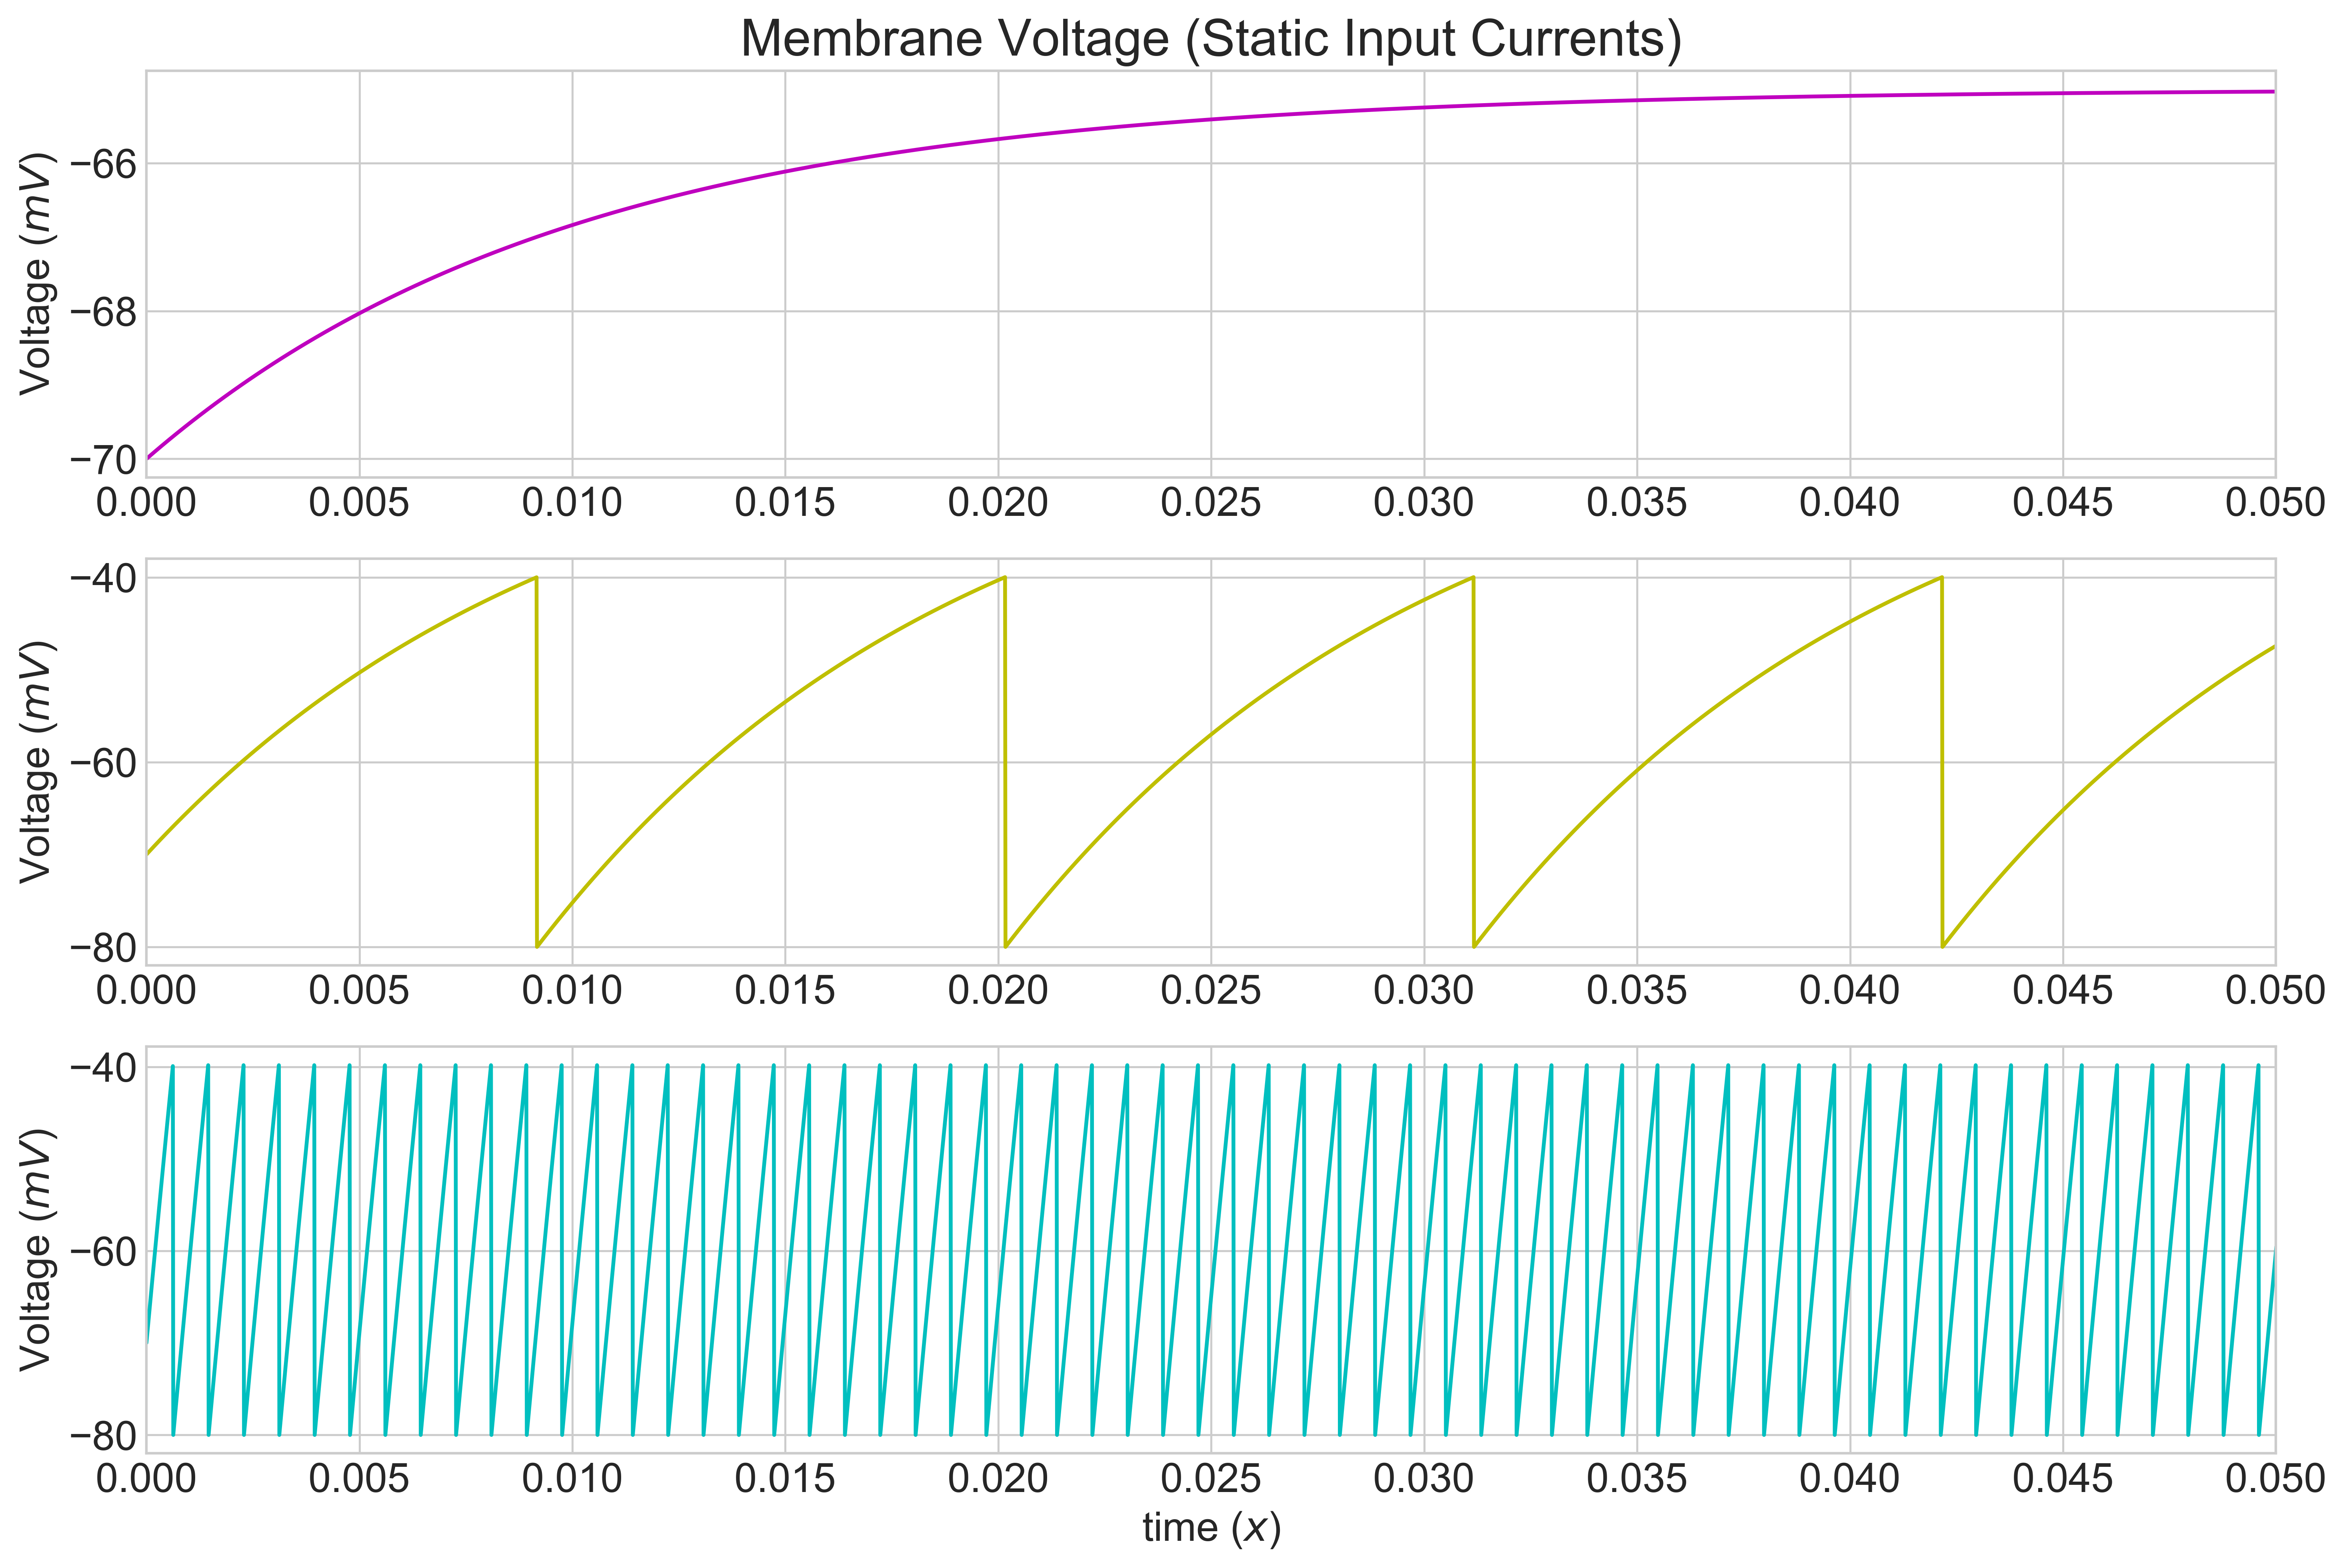

In [8]:
dt = 10*us # time step
t_max = 1*S # total time
time = np.arange(0, t_max, dt)
R_m = 50*MOhms # Membrane Resistance
C_m = 200*pF # Membrane capacitance
V_e = -70*mV # Equilibrium voltage
V_reset = -80*mV # Hyperpolarization/reset voltage
V_th = -40*mV # Threshold voltage
Input_Is = np.asarray([100*pA, 1*nA, 10*nA]) 

def voltageModel(dt, R_m, C_m, V_e, V_reset, V_th, Input_Is):
    V_m = np.zeros(time.shape)
    V_m[0] = V_e
   
    for i in range(1, V_m.shape[0]):   
        dV = dt * (-1/R_m * (V_m[i-1]-V_e) + Input_Is)/C_m
        V_m[i] = V_m[i-1] + dV
        
        if V_m[i-1] >= V_th:
            V_m[i] = V_reset
            
    return V_m

plt.figure(1, figsize=FIG_SIZE, dpi=DPI)
for I in range(Input_Is.shape[0]):
    plt.subplot(3, 1, I+1)
    if I == 0:
        plt.title('Membrane Voltage (Static Input Currents)', fontsize=TITLE_FONT_SIZE)
    plt.plot(time, voltageModel(dt, R_m, C_m, V_e, V_reset, V_th, Input_Is[I])/mV, character_color[I])
    plt.ylabel('Voltage ($mV$)')
    plt.xticks(np.arange(0, t_max, 5*mS), fontsize=LABEL_FONT_SIZE)
    plt.xlim((0,50*mS))  

plt.xlabel('time ($x$)')

#### Q3 - Part 2

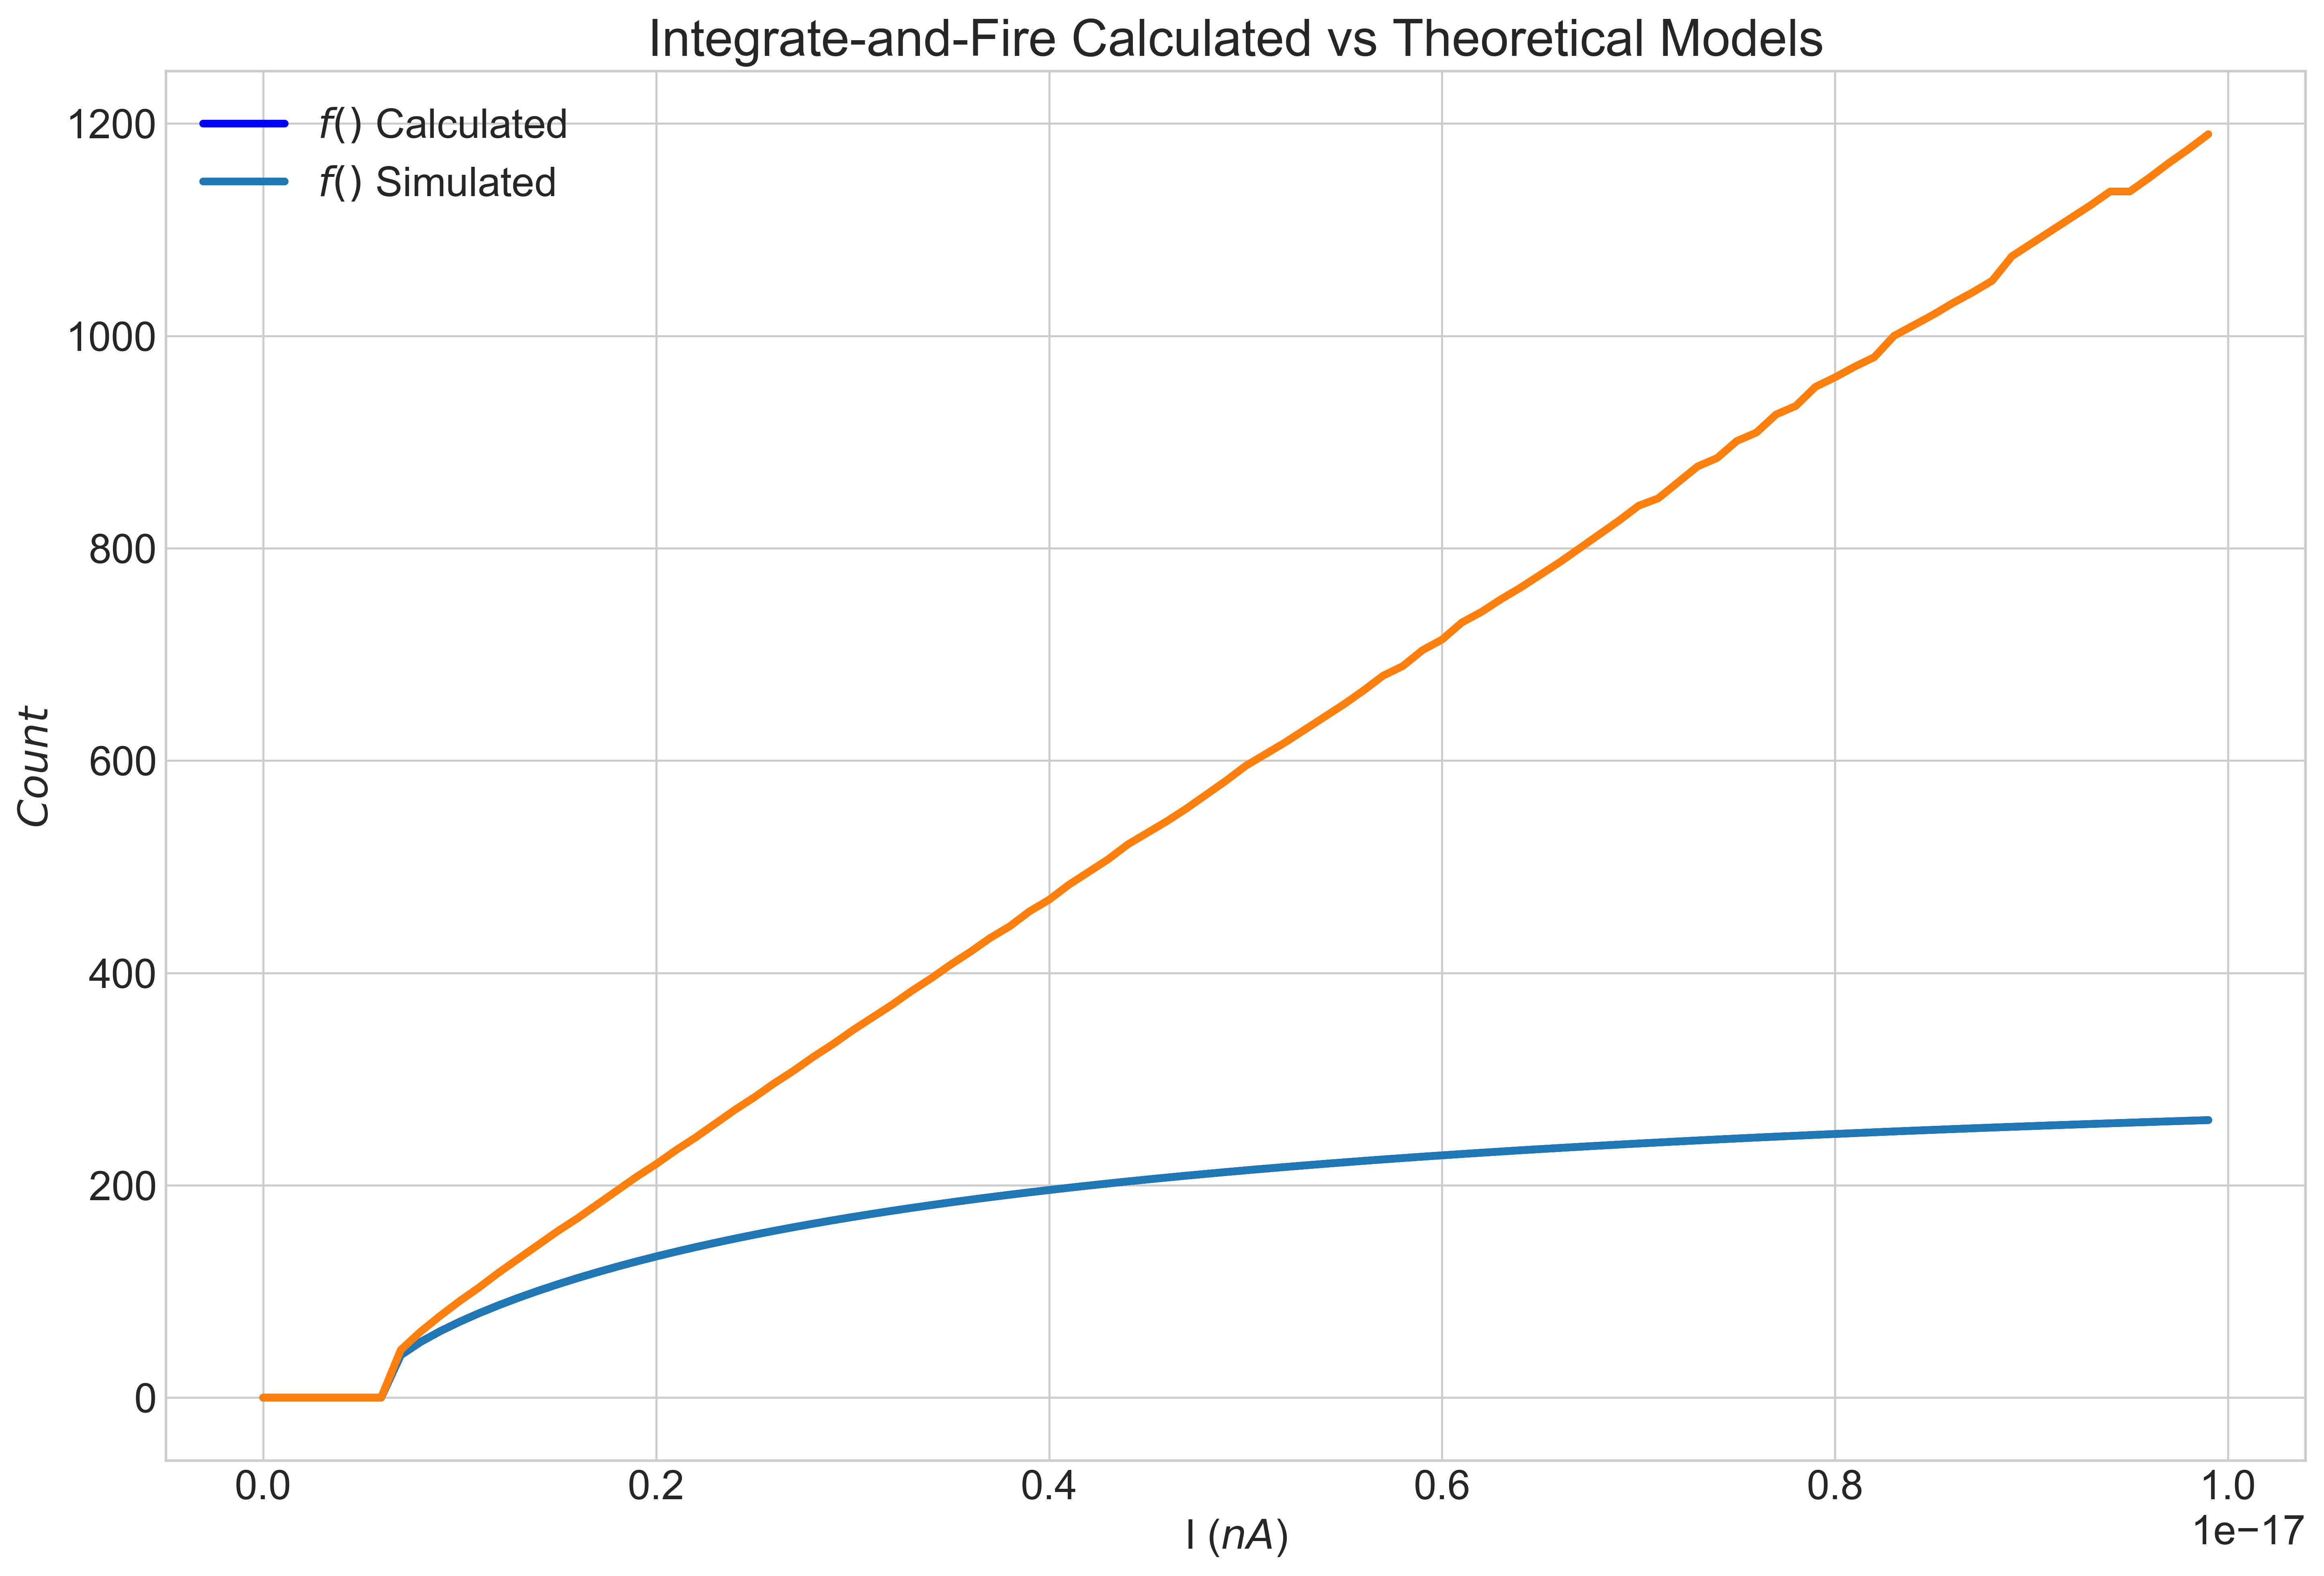

In [9]:
T_ref = 3*mS # Refractory time
R_m = 50*MOhms # Membrane Resistance
C_m = 200*pF # Membrane capacitance
V_e = -70*mV # Equilibrium voltage
V_reset = -80*mV # Hyperpolarization/reset voltage
V_th = -40*mV # Voltage threshold

def frequencyModel(T_ref, R_m, C_m, V_e, V_reset, V_th, I):
    Ith = (V_th - V_e)/R_m
    if I < Ith:
        return 0
    
    f = (T_ref + R_m*C_m*np.log((I*R_m+V_e-V_reset)/(I*R_m+V_e-V_th)))**-1
    
    return f

I = np.arange(0, 10*nA, 100*pA)
f_calc = np.zeros(I.shape[0])

for i in range(f_calc.shape[0]):
    f_calc[i] = frequencyModel(T_ref, R_m, C_m, V_e, V_reset, V_th, I[i])

plt.figure(1, figsize=FIG_SIZE, dpi=DPI)
plt.title('Integrate-and-Fire Calculated vs Theoretical Models', fontsize=TITLE_FONT_SIZE)
plt.plot(I*nA,f_calc, character_color[3], linewidth=LINE_WIDTH)
plt.xlabel("I ($nA$)")
plt.ylabel('Membrane Voltage (mV)')
plt.xticks(fontsize=LABEL_FONT_SIZE)

dt = 10*us
t_max = 1*S
time = np.arange(0, t_max, dt)

def spikeIFModel(dt, R_m, C_m, V_e, V_reset, V_th, Input_Is):
    V_m = np.zeros(time.shape)
    Spike_count = 0 
    V_m[0] = V_e
    # Let's figure out dV
    for i in range(1, V_m.shape[0]):  
        dV = dt * (-1/R_m * (V_m[i-1]-V_e) + Input_Is)/C_m
        V_m[i] = V_m[i-1] + dV
       
        if V_m[i-1] >= V_th:
            V_m[i] = V_reset
            Spike_count += 1

    return Spike_count

f_sim = np.zeros(I.shape)
for i in range(I.shape[0]):
    f_sim[i] = spikeIFModel(dt, R_m, C_m, V_e, V_reset, V_th, I[i])

plt.figure(1, figsize=FIG_SIZE, dpi=DPI)
plt.plot(I*nA, f_calc, linewidth=LINE_WIDTH)
plt.plot(I*nA, f_sim, linewidth=LINE_WIDTH)
plt.title('Integrate-and-Fire Calculated vs Theoretical Models', fontsize=TITLE_FONT_SIZE)
plt.xlabel("I ($nA$)")
plt.ylabel("$Count$")
plt.legend(['$f()$ Calculated', '$f()$ Simulated'], loc="best")

Though in the current resolution on the graph these may not seem to closely resemble eachother, if you zoom into the initial changes in count versus current the calculated and simulated present great identity to eachother.
This is further examined by eliminating the differentiating factor $T_ref$ by dropping the value to 0 induces these curves to match eachother, showing introducing a refractory period improves modeling of biological models.
Nevertheless, the calculated and simulated frequency models converge greatly.

#### Q3 - Part 3

Text(0.5, 0, 'Inter - Spike Period')

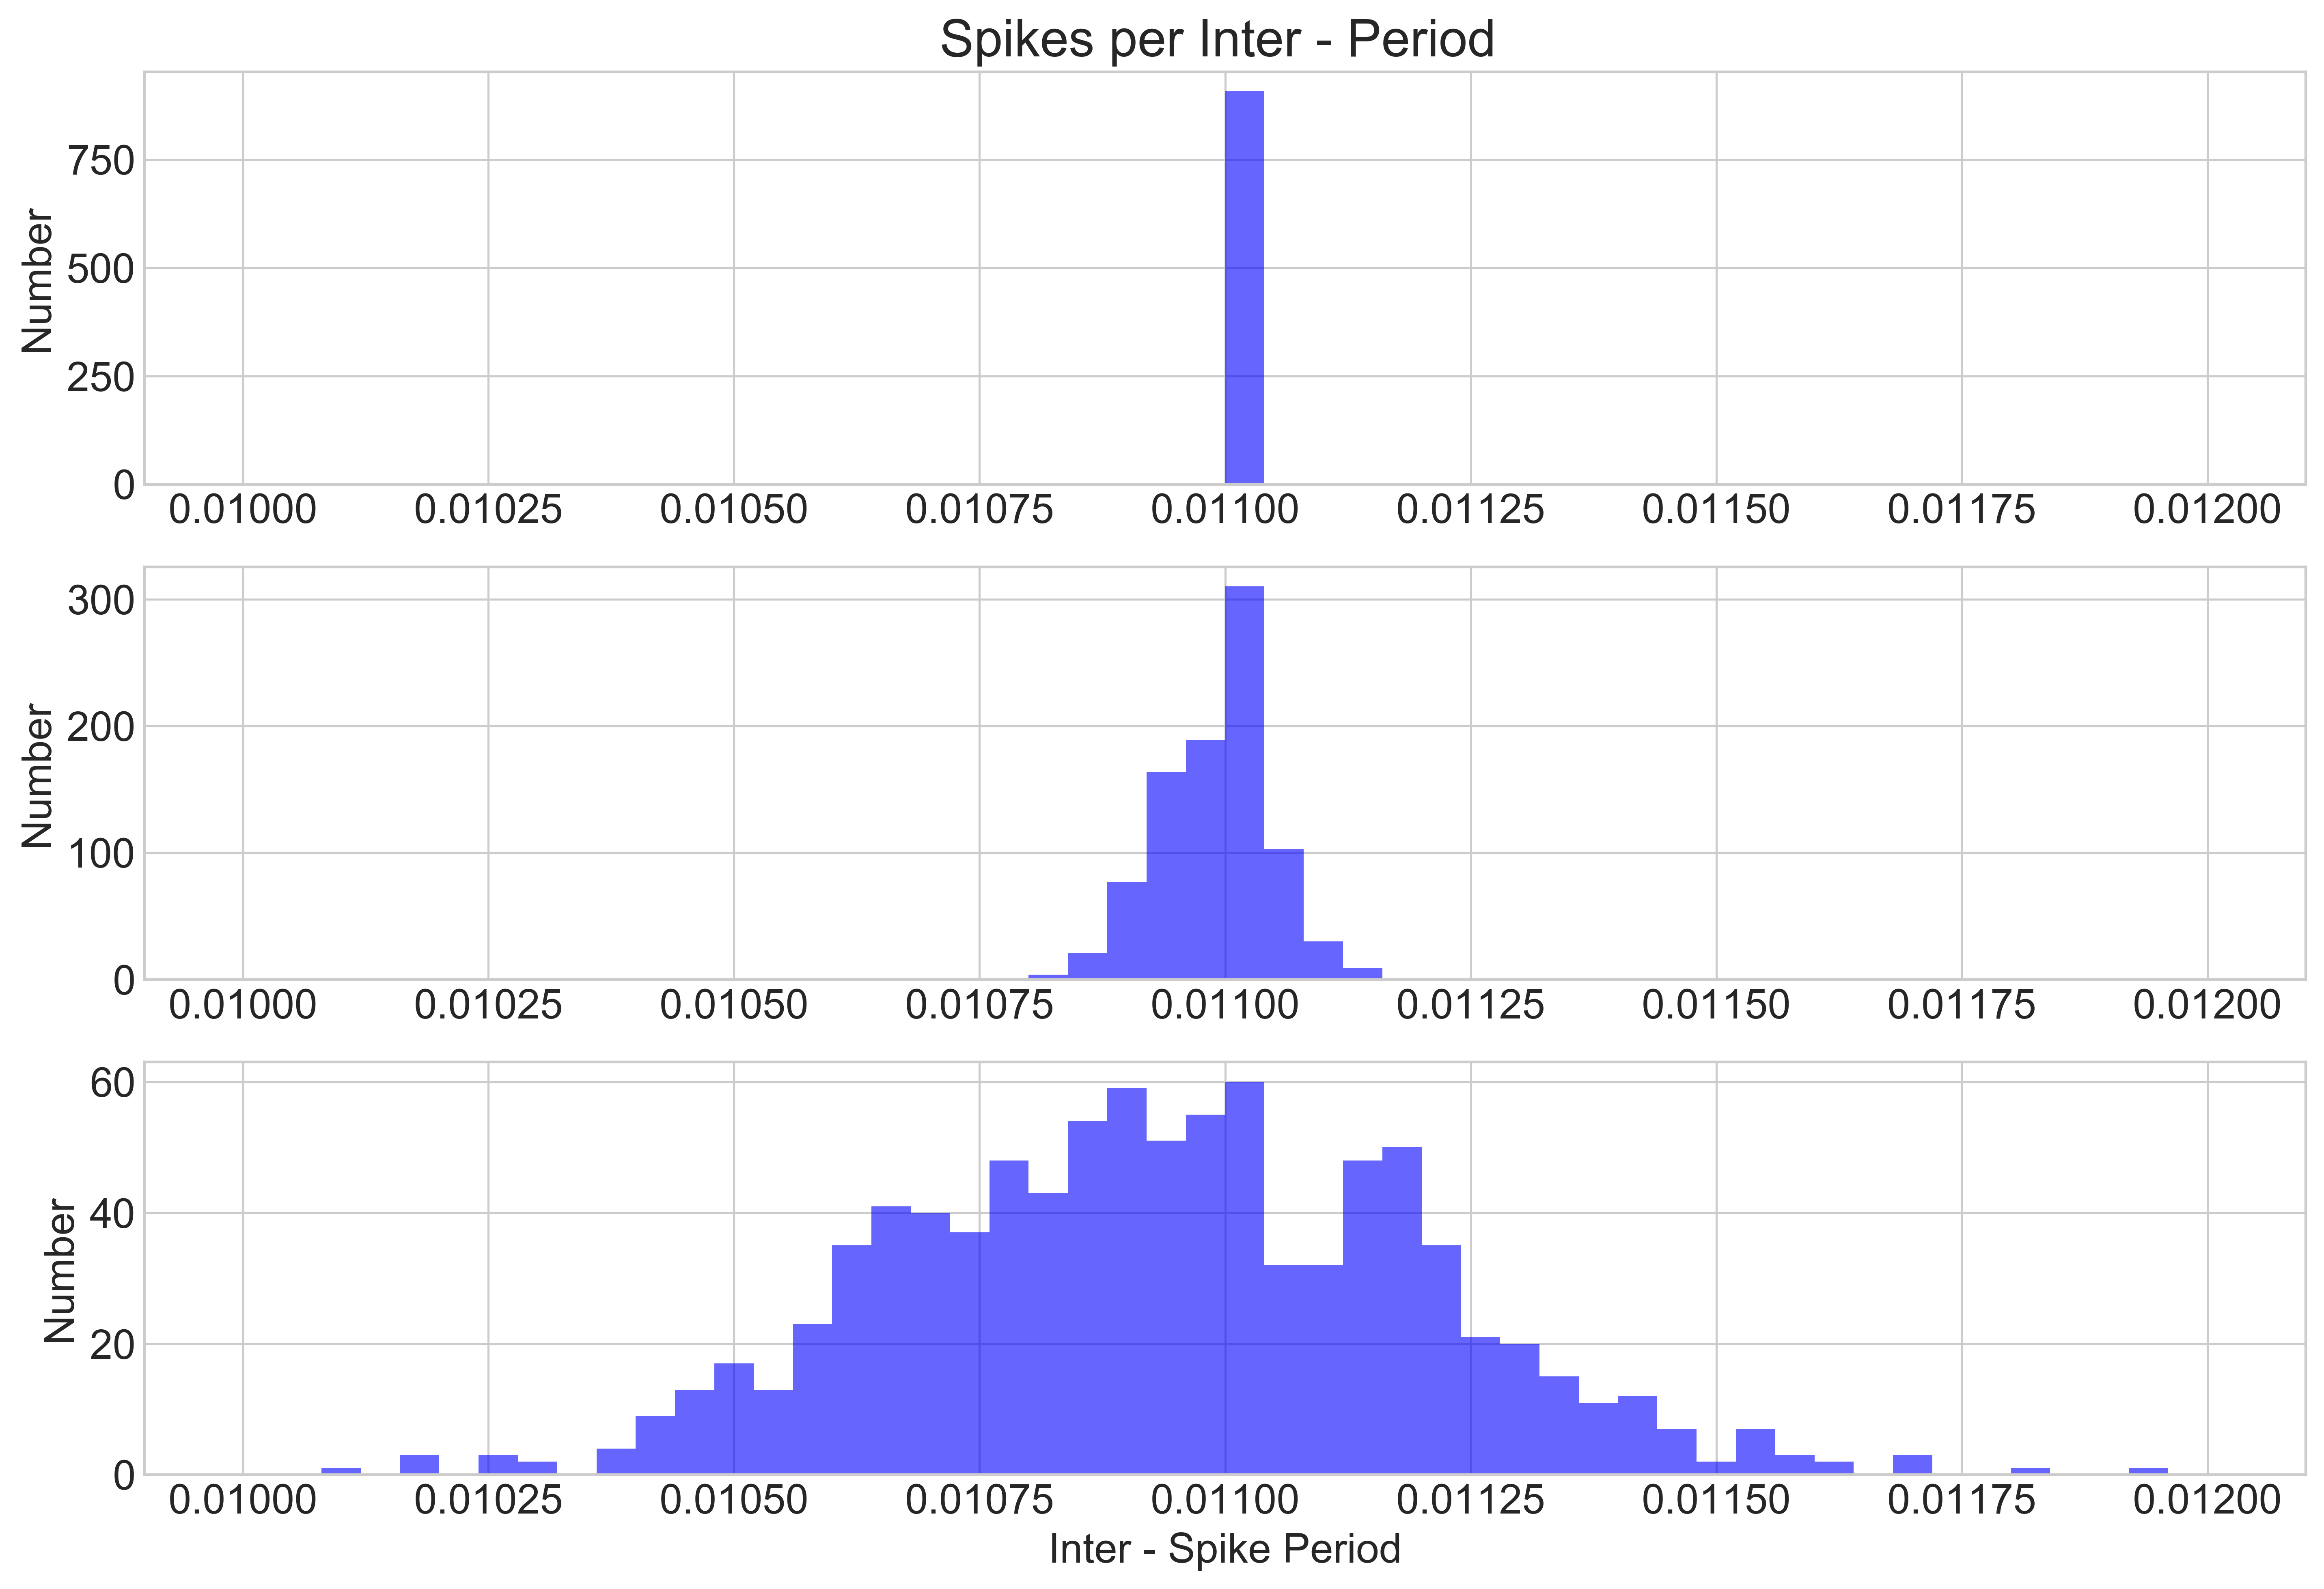

In [10]:
dt = 10*us # Time step
t_max = 10*S # Total time
time = np.arange(0, t_max, dt) # Time array
T_ref = 3*mS # Refactory time
R_m = 50*MOhms #Membrane Resistance
C_m = 200*pF # Membrane capacitance
V_e = -70*mV # Equilibrium voltage
V_reset = -80*mV # Hyperpolarization/reset voltage
V_th = -40*mV # Threshold voltage

def gaussSpikeIFModel(dt, R_m, C_m, V_e, V_reset, V_th, Isigma):
    V_m = np.zeros(time.shape)
    Imean = 1000*pA
    Inoisy = np.random.normal(Imean, Isigma, (time.shape[0], 1))
    Spike_count = 0
    V_m[0] = V_e 
    
    spikes = []
    last_spike_idx = 0    
    for i in range(1, V_m.shape[0]):
        dV = dt* (-1/R_m * (V_m[i-1]-V_e) + (Inoisy[i] if Inoisy[i] > 0 else 0))/C_m
        V_m[i] = V_m[i-1] + dV
        
        if V_m[i-1] >= V_th:
            V_m[i] = V_reset
            spikes.append((i-last_spike_idx)*dt) 
            last_spike_idx = i
            
    return np.asarray(spikes) # inter-spike periods
    
Input_Is = np.asarray([0, 100*pA, 500*pA])

plt.figure(1, figsize=FIG_SIZE, dpi=DPI)
for I in range(Input_Is.shape[0]):
    plt.subplot(3, 1, I+1)
    if I == 0:
         plt.title("Spikes per Inter - Period ", fontsize=TITLE_FONT_SIZE)
    spikecounts = gaussSpikeIFModel(dt, R_m, C_m, V_e, V_reset, V_th, Input_Is[I])
    plt.hist(spikecounts, bins=50, range=(0.010, 0.012), color=character_color[3], alpha=0.6)
    plt.ylabel("Number")
    
plt.xlabel("Inter - Spike Period")

Text(0, 0.5, 'Gating Value')

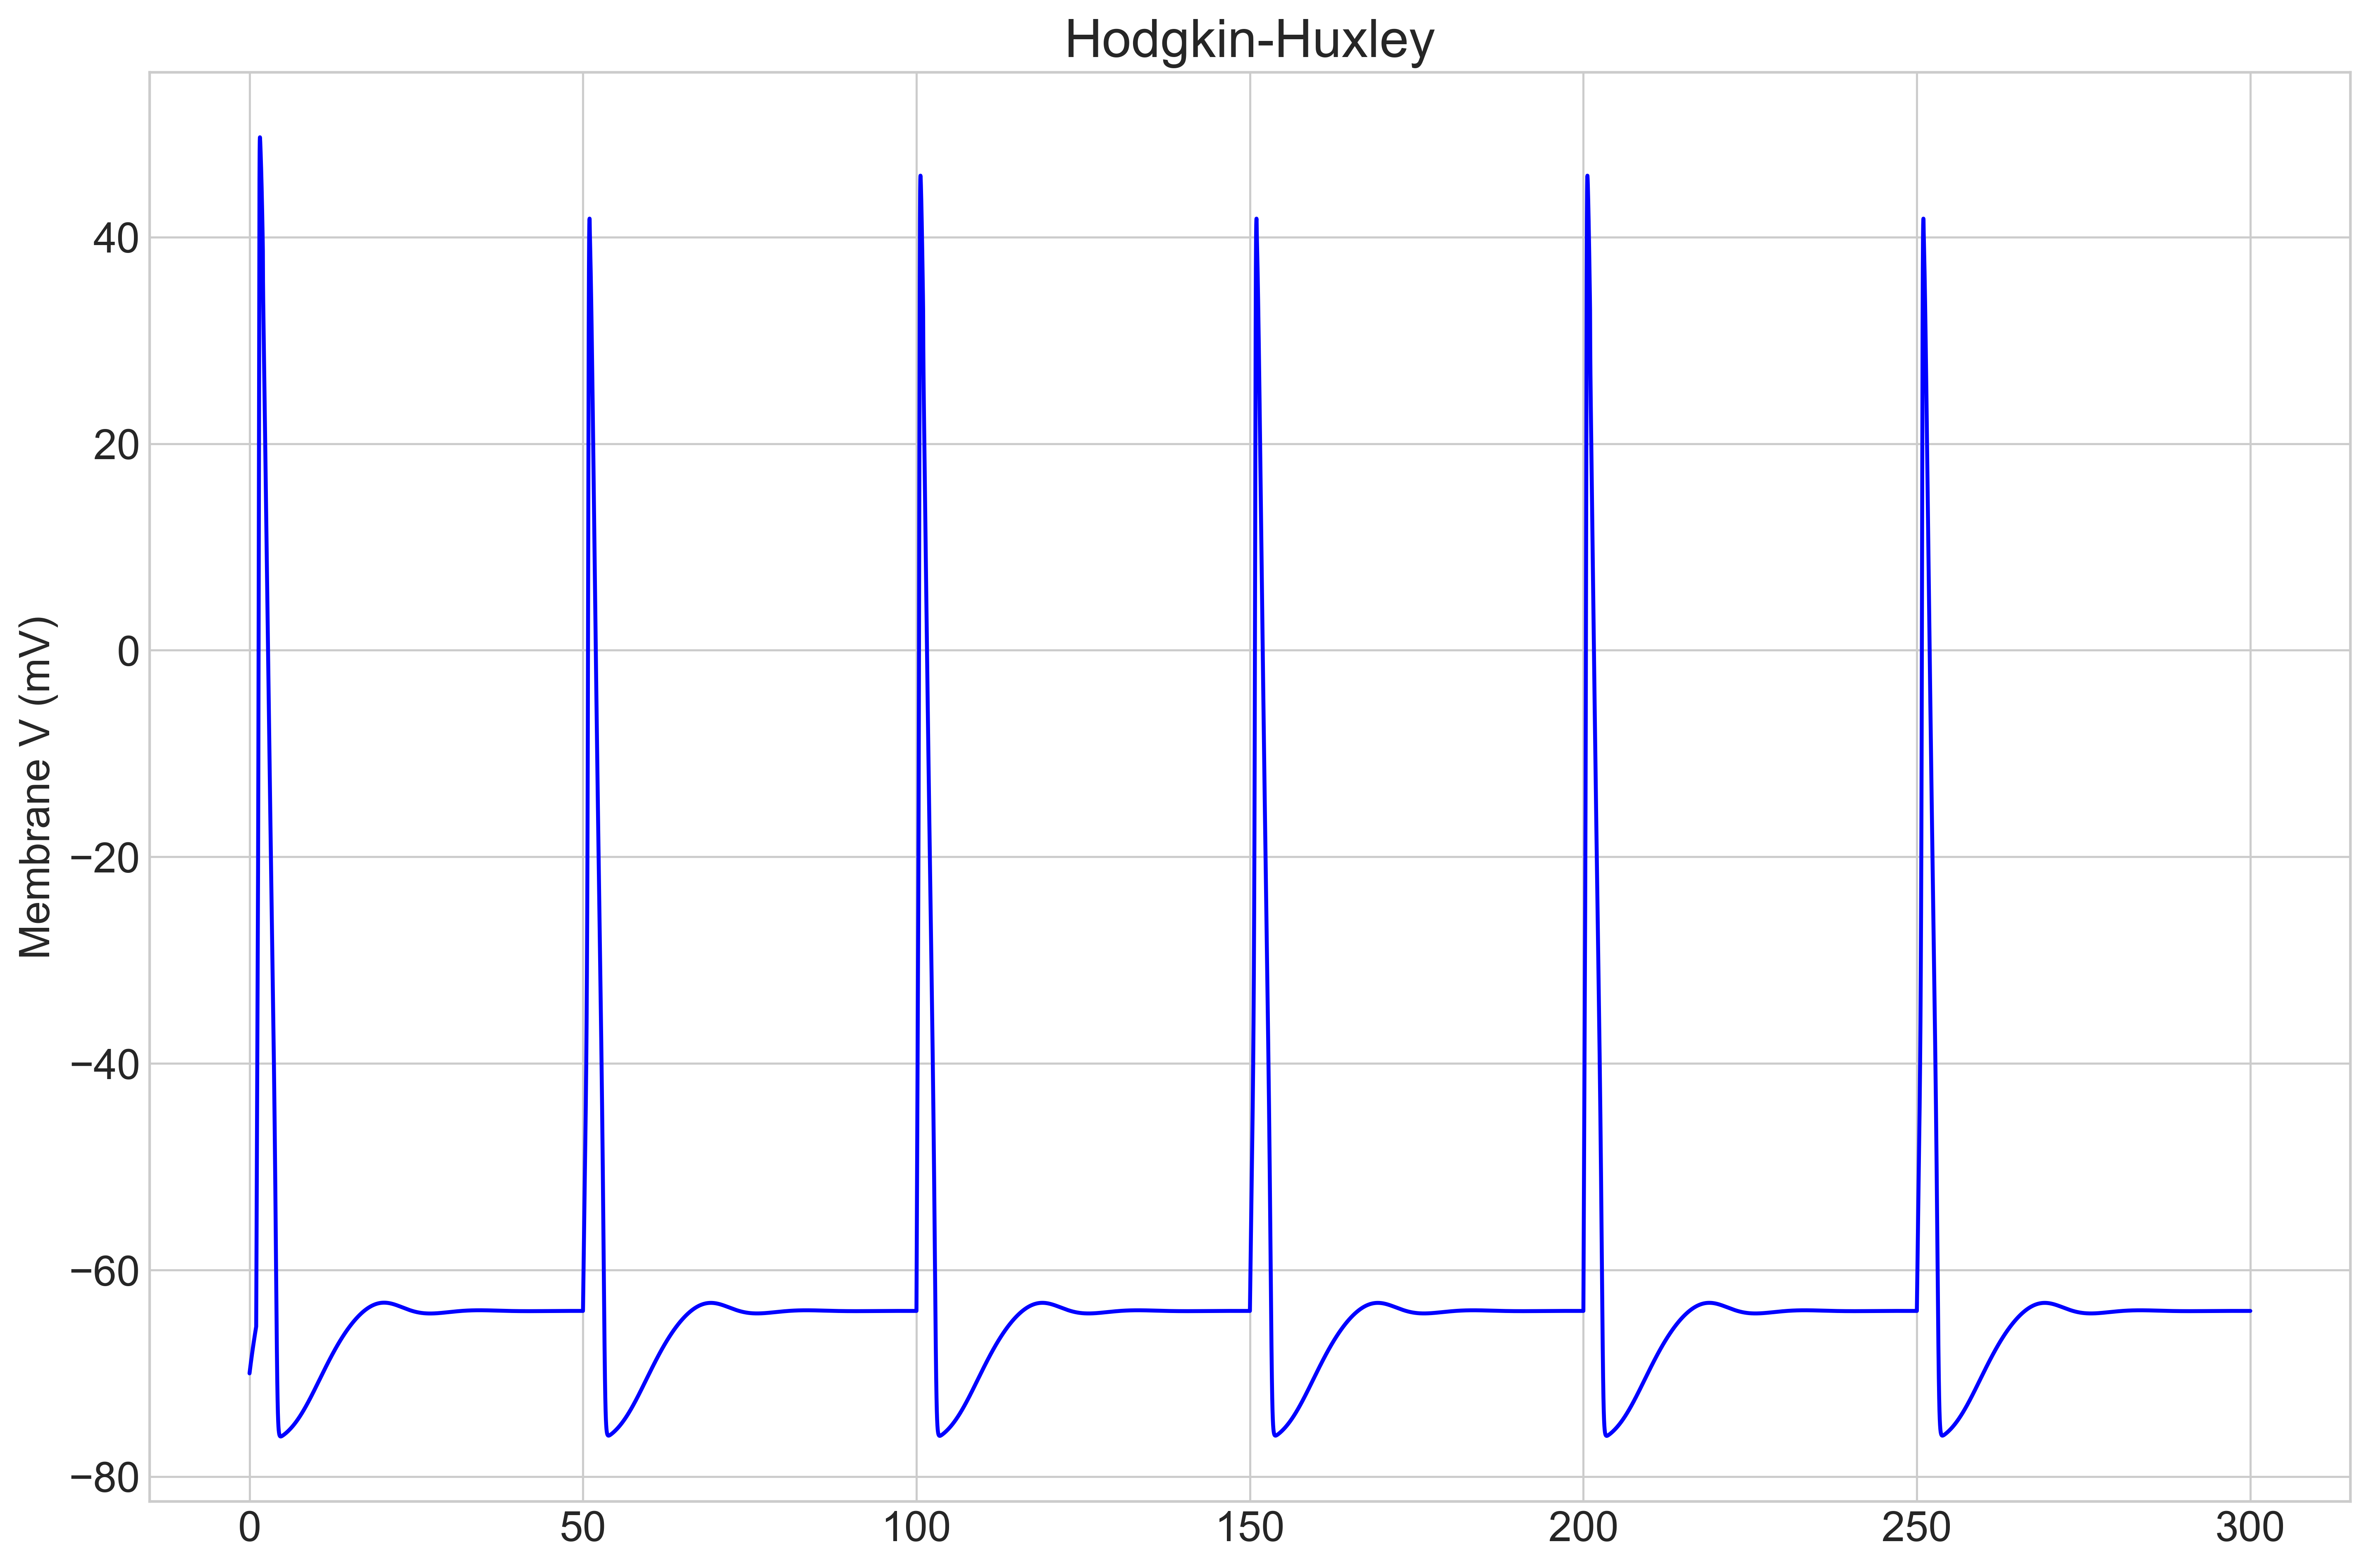

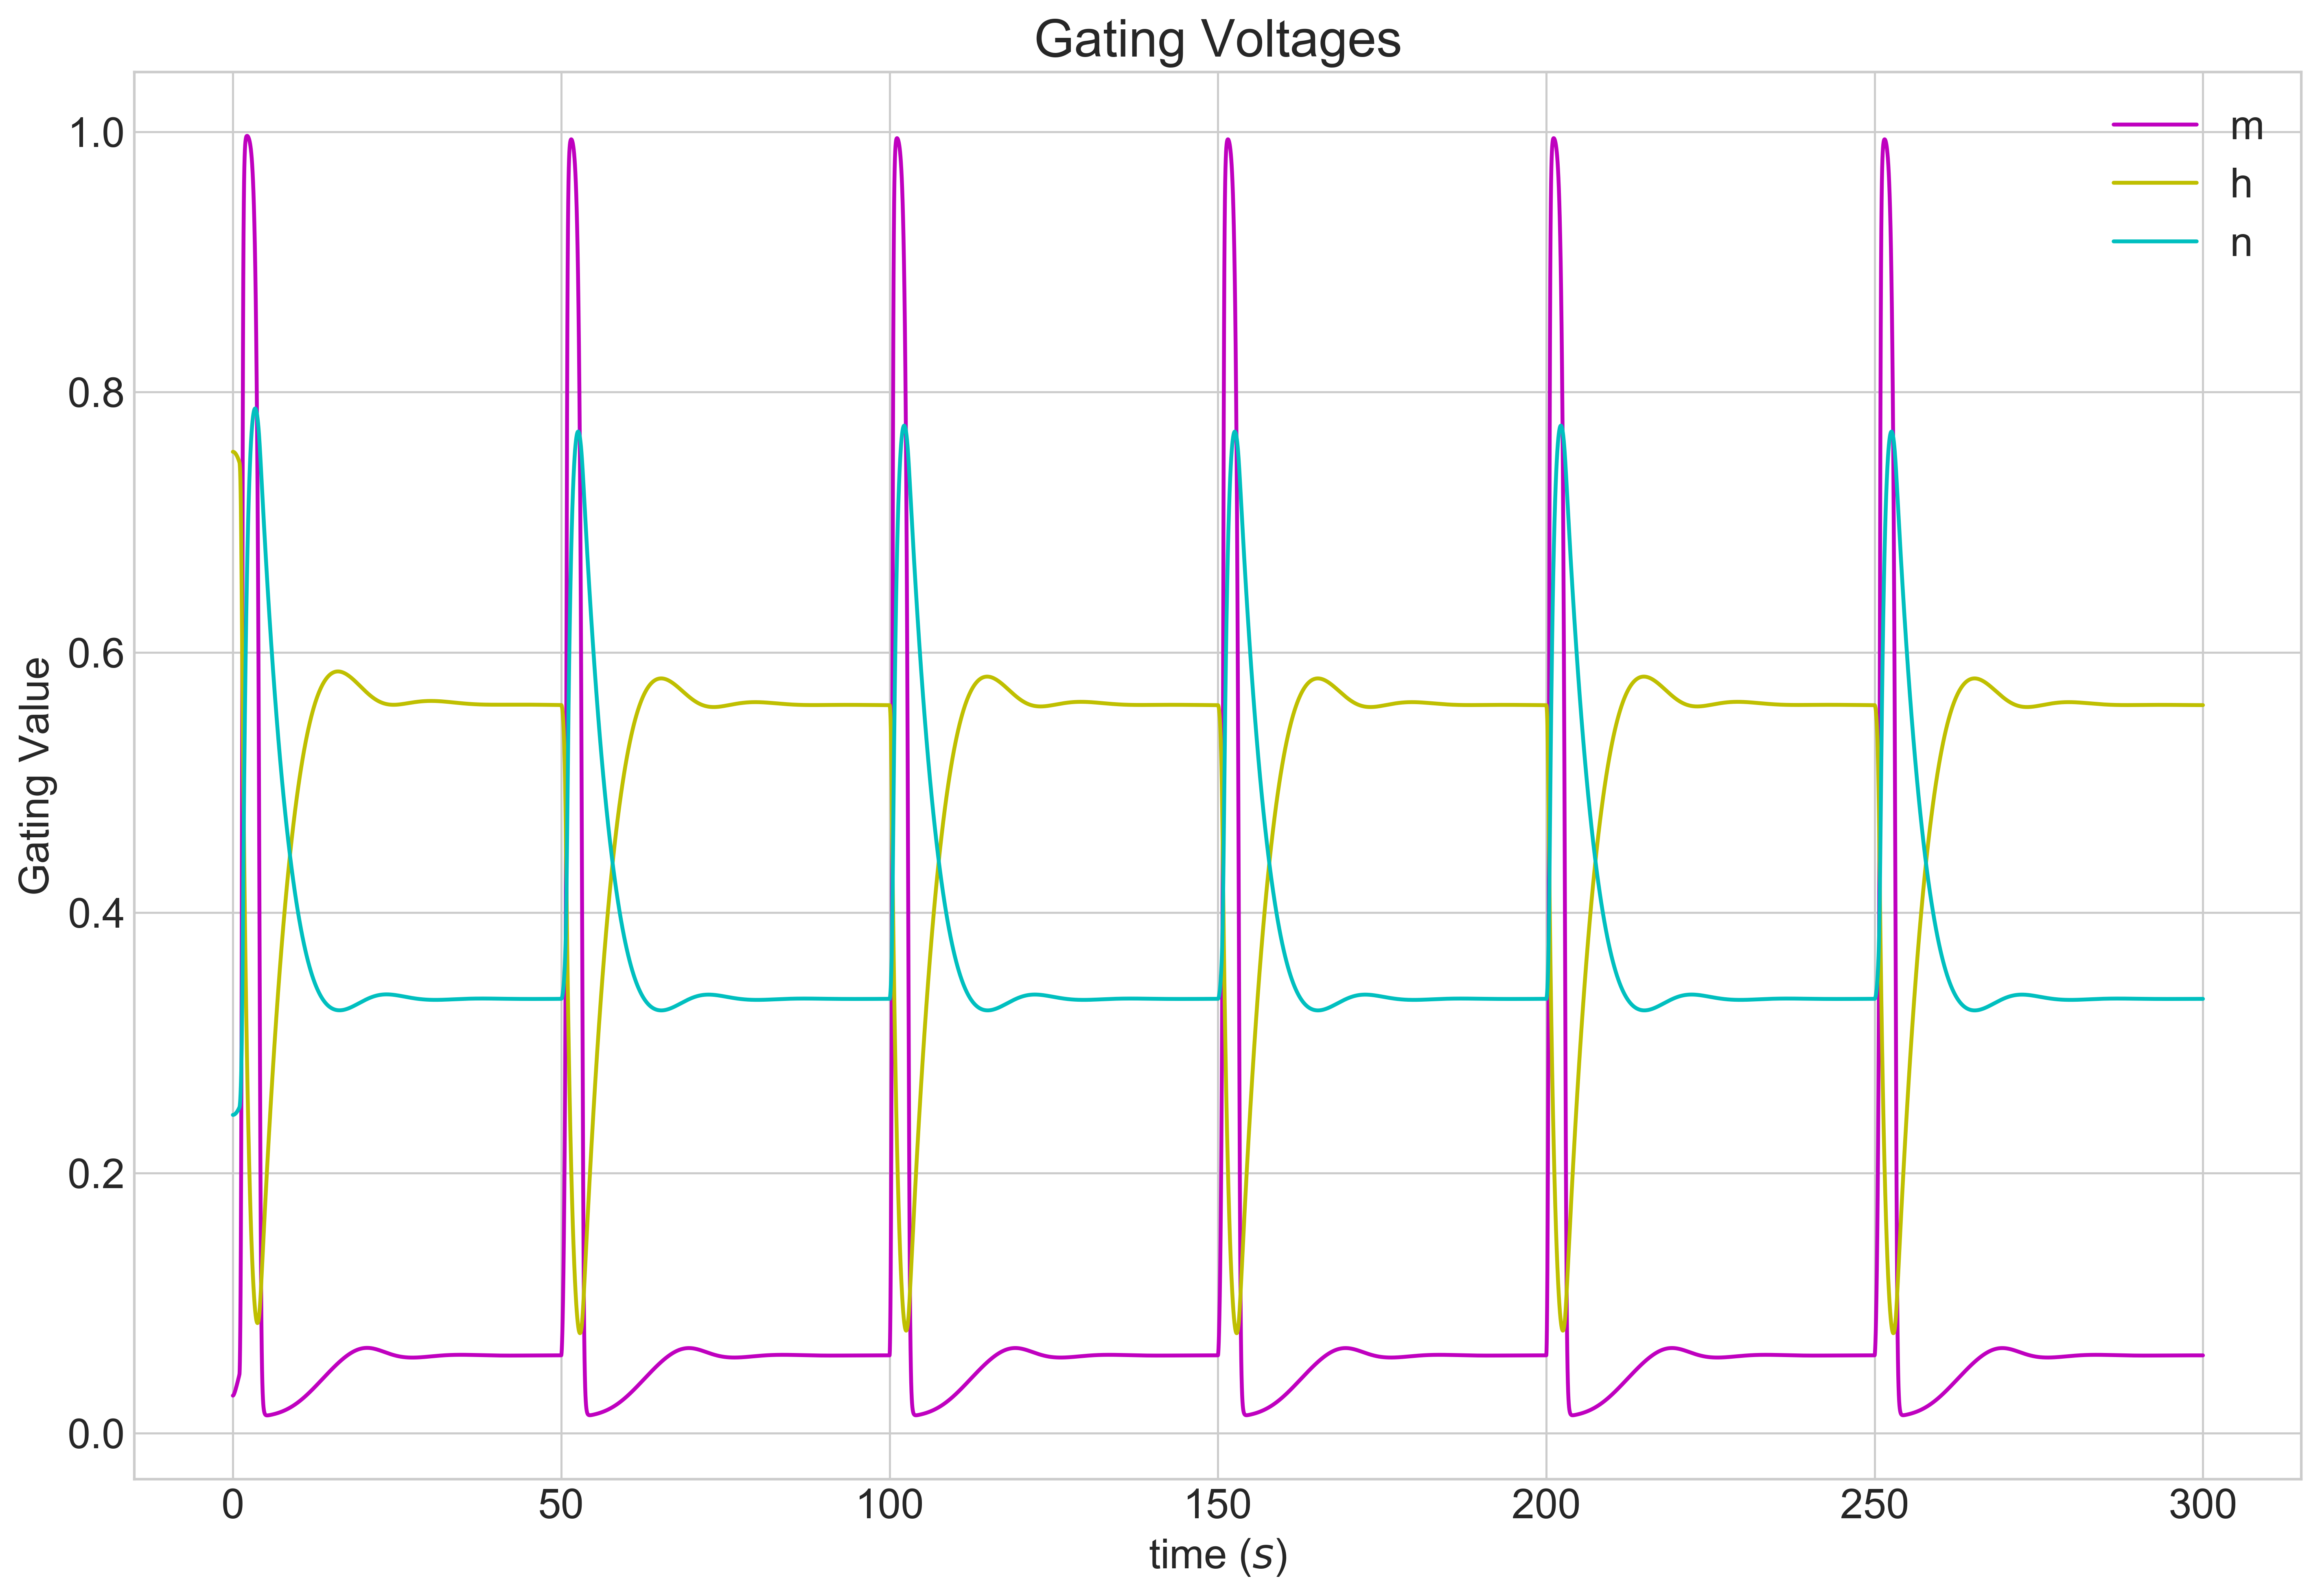

In [11]:
Alpha_n = lambda V_m:0.01*(V_m+55)/(1-np.exp(-(V_m+55)/10))
Alpha_m = lambda V_m: 0.1*(V_m+40)/(1-np.exp(-(V_m+40)/10))
Alpha_h = lambda V_m: 0.07*np.exp(-(V_m+65)/20)

Beta_n = lambda V_m: 0.125*np.exp(-(V_m+65)/80)
Beta_m = lambda V_m: 4*np.exp(-(V_m+65)/18)
Beta_h = lambda V_m: 1/(1+np.exp(-(V_m+35)/10))

# Set up constants
Cm = 1
gk = 36
gna = 120
gl = 0.3
Vna = 50
Vk = -77
Vl = -50
V_e = -70

# I = Cdv/dt + Ik + Ina + Il
# dV/dt = 1/C_m * (I- (Ik + Ina + Il))
Ik = lambda gk, n, V_m, Vk: gk*n**4*(V_m-Vk)
Ina = lambda gna, m, h, V_m, Vna: gna*m**3*h*(V_m-Vna)
Igl = lambda gl, V_m, Vl: gl*(V_m-Vl)

m_inf = Alpha_m(V_e)/(Alpha_m(V_e)+Beta_m(V_e))
h_inf = Alpha_h(V_e)/(Alpha_h(V_e)+Beta_h(V_e))
n_inf = Alpha_n(V_e)/(Alpha_n(V_e)+Beta_n(V_e))

dt = 1*mS
time = np.arange(0,300*S,dt)

def Vm_eq(X, time):
    V_m, m, h, n = X
    I = 150.0*((time>1) - (time > 2)) + 50 * ((time > 50) - (time>51)) + 150.0*((time>100) - (time > 101)) + 50 * ((time > 150) - (time>151))+ 150.0*((time > 200) - (time>201)) + 50 * ((time > 250) - (time>251))+ 150.0*((time>300) - (time > 301)) + 50 * ((time > 350) - (time>351))
    dVdt = 1/Cm * (I-Ik(gk, n, V_m, Vk) - Ina(gna, m, h, V_m, Vna) - Igl(gl, V_m, Vl))
    # determine gating values
    dmdt = Alpha_m(V_m)*(1-m)-Beta_m(V_m)*m
    dhdt = Alpha_h(V_m)*(1-h)-Beta_h(V_m)*h
    dndt = Alpha_n(V_m)*(1-n)-Beta_n(V_m)*n
    return dVdt, dmdt, dhdt, dndt

def HodgkinHuxley(time):
    s = odeint(Vm_eq,  [V_e,  m_inf, h_inf, n_inf], time)
    return s

plt.figure(1, figsize=FIG_SIZE, dpi=DPI)
plt.title('Hodgkin-Huxley', fontsize=TITLE_FONT_SIZE)
plt.plot(time, HodgkinHuxley(time)[:,0], character_color[3])
plt.ylabel('Membrane V (mV)')

plt.figure(2, figsize=FIG_SIZE, dpi=DPI)
plt.plot(time, HodgkinHuxley(time)[:,1], character_color[0])
plt.plot(time, HodgkinHuxley(time)[:,2], character_color[1])
plt.plot(time, HodgkinHuxley(time)[:,3], character_color[2])
plt.legend(['m', 'h', 'n'], loc="best")
plt.title('Gating Voltages', fontsize=TITLE_FONT_SIZE)
plt.xlabel('time ($s$)')
plt.ylabel('Gating Value')
